<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module H Part 2

Isaac Nunez

Section 22.4: Numerical Error and Instability

When using approximations to solve ODEs, it is important to take into account the potential for errors. Numerical approximations aren't perfect, so it is necessary to ensure your result falls under a certain error threshold.

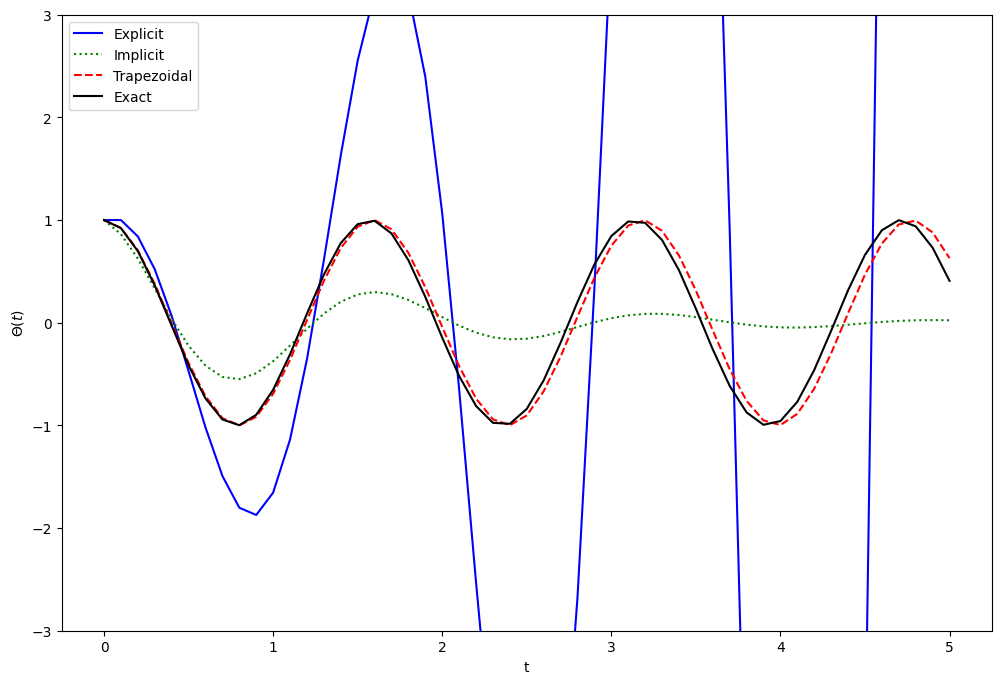

In [1]:
#The following example from the lesson compares the implicit, explicit, and trapezoidal Euler methods for approximating an ODE. The exact solution should be cos(x)
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]]) #Explicit Formula
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]])) #Implicit Formula
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]])) #Trapezoidal Formula

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])


#Plot Result
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

As you can see, the Explicit formula has a very large error. The Implicit formula has a significant decay overtime. The trapezoidal formula is the most accurate, but it still loses accuracy over time.

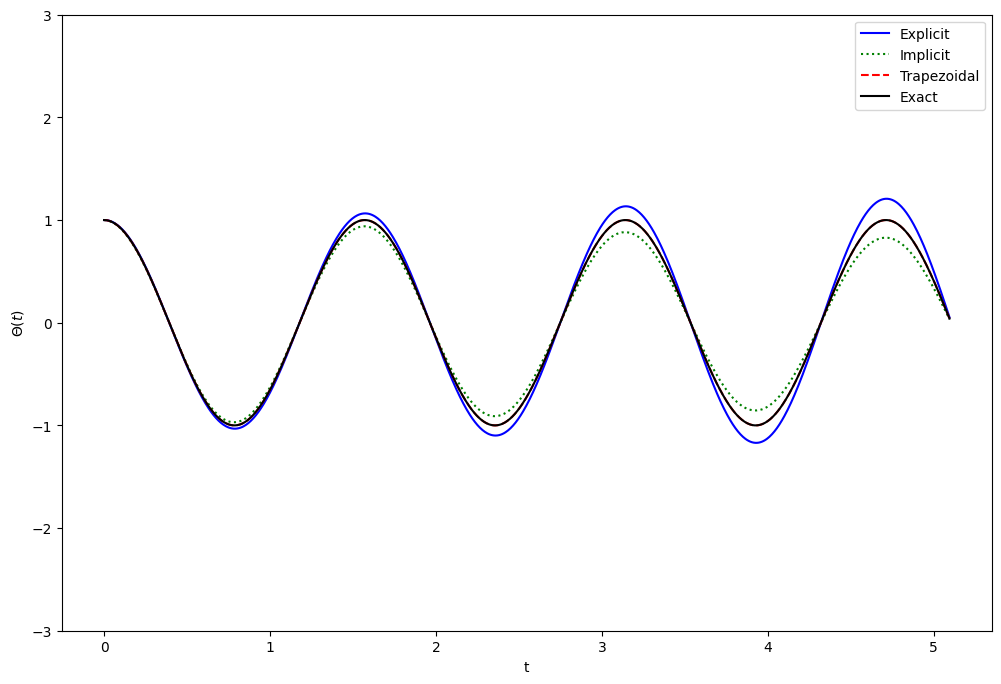

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# define step size
h = 0.005 #Step size is decreased to 0.005
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]]) #Explicit Formula
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]])) #Implicit Formula
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]])) #Trapezoidal Formula

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])


#Plot Result
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

As we decrease the step size, the error decreases for all methods, but they still decrease in accuracy over time.

Section 22.5: Predictor-Corrector Methods

Predictor-corrector methods take the function F at several locations and find the average, which improves the accuracy of the prediction over a normal implicit or explicit method. An example of a predictor-corrector method is the midpoint method, which uses the predictor formula:

$S(t_j+\frac{h}{2})=S(t_j)+\frac{h}{2}F(t_j,S(t_j))$

And the corrector formula:

$S(t_{j+1}) = S(t_j) + hF(f_j+\frac{h}{2},S(t_j+\frac{h}{2}))$

Another way to improve the accuracy of an ODE approximation are Runge Kutta methods. The Runge Kutta method utilizes truncated taylor series in order to approximate the exact solution without having to go through $S^n$ Iterations. Another advantage is that you can use higher order RK methods in order to get more accurate results. A commonly used method is the fourth-order RK method, defined as:

$k_1 = F(t_j,S(t_j)) \\
k_2 = F(t_j + \frac{h}{2}, S(t_j) + \frac{1}{2}k_1h) \\
k_3 = F(t_j + \frac{h}{2}, S(t_j) + \frac{1}{2}k_2h) \\
k_4 = F(t_j + h, S(t_j) + k_3h) \\
S(t_{j+1}) = S(t_j) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

This allows us to take much more accurate approximations of ODEs than with standard Euler approximations.